# Python project
The purpose and goal with the analysis is to explore functions and syntax in python, 

to find information in the data and to be familiar with the fundamental basics infrastructures within python.

The report has conducted findings and insights.

starting with the essentials

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np

Read data

In [203]:
df = pd.read_csv('/Users/lucy/Documents/Vinter/merged_goldeikon.csv')

# Describe Data set 
when describing the dataset we get a summary and overview on it's context

In [204]:
df.head(5)

,datetime,close,amount,ex_symbol
0,2021-02-04,173.26,354292.0,l_sgld
1,2021-02-03,177.79,26805.0,l_sgld
2,2021-02-02,177.91,21356.0,l_sgld
3,2021-02-01,180.30,38422.0,l_sgld
4,2021-01-29,179.91,102532.0,l_sgld


In [205]:
df.describe()

,close,amount
count,11968.000000,1.196800e+04
mean,253.108282,1.041352e+05
std,385.863657,4.346516e+05
min,21.260000,1.000000e+00
25%,119.560000,3.008250e+03
50%,126.345000,1.163700e+04
75%,155.030000,5.586175e+04
max,1959.000000,1.708597e+07


In [206]:
df.round()

,datetime,close,amount,ex_symbol
0,2021-02-04,173.0,354292.0,l_sgld
1,2021-02-03,178.0,26805.0,l_sgld
2,2021-02-02,178.0,21356.0,l_sgld
3,2021-02-01,180.0,38422.0,l_sgld
4,2021-01-29,180.0,102532.0,l_sgld
...,...,...,...,...
11963,2016-01-08,1073.0,1862.0,s_zgldus
11964,2016-01-07,1076.0,12058.0,s_zgldus
11965,2016-01-06,1060.0,4357.0,s_zgldus
11966,2016-01-05,1047.0,2986.0,s_zgldus


# Exchange Traded Fund
We can find information about the diffrent etf's and it's values

In [207]:
df['ex_symbol'].unique()

array(['l_sgld', 's_sgld', 'l_igln', 'l_xgld', 's_xgld', 'l_gbsx',
       'l_phau', 's_csgold', 'l_sgbs', 's_zgldus'], dtype=object)

In [208]:
df['ex_symbol'].nunique()

10

In [209]:
df["ex_symbol"].value_counts()

l_phau      1289
l_xgld      1289
l_sgld      1289
l_igln      1289
l_gbsx      1289
l_sgbs      1280
s_zgldus    1279
s_csgold    1279
s_sgld      1005
s_xgld       680
Name: ex_symbol, dtype: int64

In [210]:
df.groupby(['ex_symbol','datetime']).mean().unstack(0)

close                                                          \
ex_symbol   l_gbsx l_igln  l_phau  l_sgbs  l_sgld  l_xgld s_csgold  s_sgld   
datetime                                                                     
2016-01-04  102.54  21.26  103.78  105.05  105.53  105.82   105.54  105.91   
2016-01-05  102.82  21.32  104.23  105.32  105.81  106.08   105.43  105.65   
2016-01-06  103.97  21.55  105.45  106.52  107.06  107.29   106.63  106.80   
2016-01-07  105.51  21.87  106.93  108.09  108.57  108.86   108.27  108.39   
2016-01-08  105.29  21.83  106.73  107.88  108.36  108.64   107.90  108.23   
...            ...    ...     ...     ...     ...     ...      ...     ...   
2021-01-29  173.39  36.29  175.98  179.01  179.91  180.31   179.44  179.92   
2021-02-01  173.89  36.35  176.55  179.53  180.30  180.58   180.00  180.14   
2021-02-02  171.48  35.89  174.06  177.19  177.91  178.22   177.64  177.90   
2021-02-03  171.33  35.89  173.93  176.86  177.79  178.32   177.40  177.34   
2021-02-04  166.91  34.95  169.52  172.31  173.26  173.56   172.64  173.26   

                               amount                                         \
ex_symbol   s_xgld s_zgldus    l_gbsx    l_igln   l_phau   l_sgbs     l_sgld   
datetime                                                                       
2016-01-04  105.86  1048.21   35927.0   48848.0  33808.0   1567.0    24000.0   
2016-01-05     NaN  1046.98   33608.0    9965.0  36818.0  10031.0    83773.0   
2016-01-06     NaN  1060.15   64732.0   46331.0  64272.0  18042.0  1111497.0   
2016-01-07     NaN  1076.09   98517.0   32573.0  76768.0   3894.0  1777423.0   
2016-01-08  107.46  1072.90  126175.0   11128.0  26347.0  53428.0   137534.0   
...            ...      ...       ...       ...      ...      ...        ...   
2021-01-29  179.70  1767.80   21223.0  597622.0  32265.0   9106.0   102532.0   
2021-02-01  181.18  1770.60    7814.0  489657.0  27440.0   3394.0    38422.0   
2021-02-02  177.74  1751.00   18496.0  170826.0  17446.0   7886.0    21356.0   
2021-02-03     NaN  1748.20    9872.0  257208.0  21328.0   1895.0    26805.0   
2021-02-04  173.56  1703.60   23698.0  823755.0  36196.0  20074.0   354292.0   

                                                        
ex_symbol    l_xgld s_csgold   s_sgld  s_xgld s_zgldus  
datetime                                                
2016-01-04   4897.0   4263.0   8163.0  2000.0    542.0  
2016-01-05   3206.0   1110.0   8000.0     NaN   2986.0  
2016-01-06   7774.0   6468.0  33995.0     NaN   4357.0  
2016-01-07    166.0   2941.0  11758.0     NaN  12058.0  
2016-01-08   3284.0   7154.0   6487.0   600.0   1862.0  
...             ...      ...      ...     ...      ...  
2021-01-29   4480.0  13010.0  14462.0    76.0   6620.0  
2021-02-01   7522.0  15816.0  18959.0   526.0   2723.0  
2021-02-02   3892.0   3675.0  12561.0   190.0   1688.0  
2021-02-03   2274.0   2783.0  11332.0     NaN   1421.0  
2021-02-04  13199.0   2963.0  18542.0  4200.0   4301.0  

[1305 rows x 20 columns]

In [211]:
df.groupby(['ex_symbol','datetime'])['close'].mean().unstack(0)

ex_symbol,l_gbsx,l_igln,l_phau,l_sgbs,l_sgld,l_xgld,s_csgold,s_sgld,s_xgld,s_zgldus
datetime,,,,,,,,,,
2016-01-04,102.54,21.26,103.78,105.05,105.53,105.82,105.54,105.91,105.86,1048.21
2016-01-05,102.82,21.32,104.23,105.32,105.81,106.08,105.43,105.65,NaN,1046.98
2016-01-06,103.97,21.55,105.45,106.52,107.06,107.29,106.63,106.80,NaN,1060.15
2016-01-07,105.51,21.87,106.93,108.09,108.57,108.86,108.27,108.39,NaN,1076.09
2016-01-08,105.29,21.83,106.73,107.88,108.36,108.64,107.90,108.23,107.46,1072.90
...,...,...,...,...,...,...,...,...,...,...
2021-01-29,173.39,36.29,175.98,179.01,179.91,180.31,179.44,179.92,179.70,1767.80
2021-02-01,173.89,36.35,176.55,179.53,180.30,180.58,180.00,180.14,181.18,1770.60
2021-02-02,171.48,35.89,174.06,177.19,177.91,178.22,177.64,177.90,177.74,1751.00


Series

In [285]:
import pandas as pd
import numpy as np
data = np.array(['l_phau','l_xgld','l_sgld','l_igln','l_gbsx','l_sgbs','s_zgldus','s_csgold','s_sgld','s_xgld'])
s = pd.Series(data,index=[1289,1289,1289,1289,1289,1280,1279,1279,1005,680])
print (s)

1289      l_phau
1289      l_xgld
1289      l_sgld
1289      l_igln
1289      l_gbsx
1280      l_sgbs
1279    s_zgldus
1279    s_csgold
1005      s_sgld
680       s_xgld
dtype: object


# matplotlib
with these timeserie analyses we get an overview on the amount and close during the time interval. 

In [271]:
df['datetime'] = pd.to_datetime(df['datetime'])

<AxesSubplot:xlabel='datetime'>

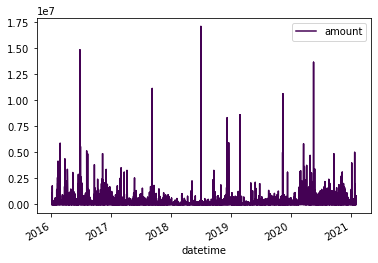

In [272]:
df.plot.line(x='datetime', y='amount', colormap='viridis', grid=False)

<AxesSubplot:xlabel='datetime'>

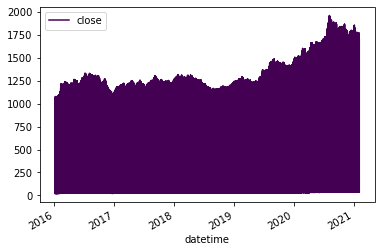

In [278]:
df.plot.line(x='datetime', y='close', colormap='viridis', grid=False) 
#Here you're plotting all close prices for the entire group.
#We need to see it for each ETF, please modify this.

<AxesSubplot:xlabel='ex_symbol'>

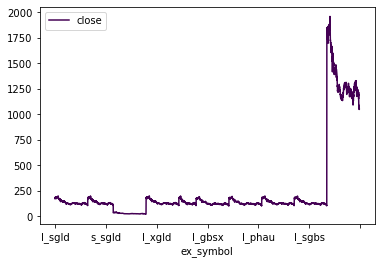

In [279]:
newdf.plot.line(x='ex_symbol', y='close', colormap='viridis', grid=False)

In [ ]:
#colormap usually helps more when you have more series,
#try plotting different series in one plot.
#You can do that by just using newdf.plot(colormap='viridis', grid=True)
#Where newdf is your groupby dataframe only with amount or close values.
#create a newdf groupby dataframe only with amount or close values
#Use your groupby dataframe to do the charts

In [280]:
df.groupby(['ex_symbol','datetime'])['amount']

In [281]:
newdf.groupby(['amount'])

In [282]:
newdf['datetime'] = pd.to_datetime(newdf['datetime'])

<AxesSubplot:xlabel='datetime'>

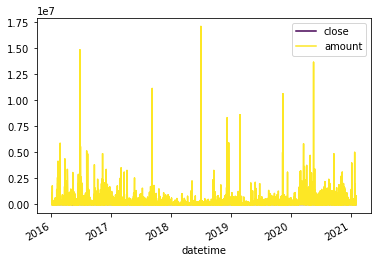

In [283]:
newdf.plot.line(x='datetime', colormap='viridis', grid=False)

<AxesSubplot:ylabel='Frequency'>

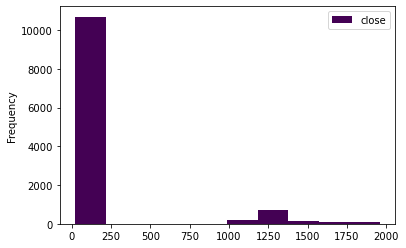

In [284]:
newdf.plot.hist(x='ex_symbol', y='close', colormap='viridis', grid=False)

<AxesSubplot:ylabel='Frequency'>

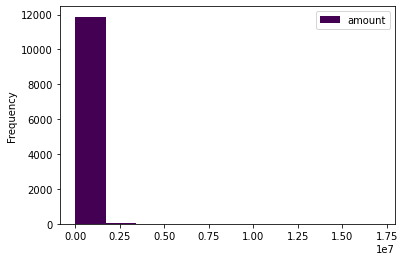

In [286]:
newdf.plot.hist(x='datetime', y='amount', colormap='viridis', grid=False)

# 
normal distribution

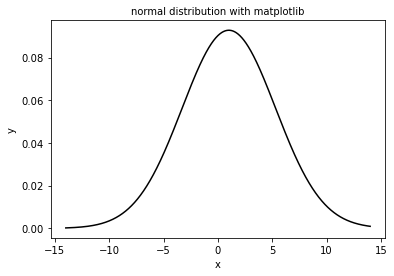

In [167]:
x = np.arange(-14, 14, 0.0014)

y = scipy.stats.norm.pdf(x,1.0,4.3)

plt.title('normal distribution with matplotlib',fontsize=10)
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("normal.png")
plt.plot(x,y, color='black')

the x axis shows the linespace between the amounts min and max
and the y axis is defined with the mean and standard deviation of amount. 
 The plot becomes like this and if comparing this plot to the histogram we can see some similarities. 

close values 

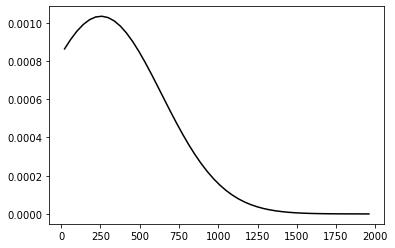

In [178]:
x = np.linspace(21.2, 1959.0)

y = scipy.stats.norm.pdf(x,253.1,385.8)

plt.plot(x,y, color='black')

amount values

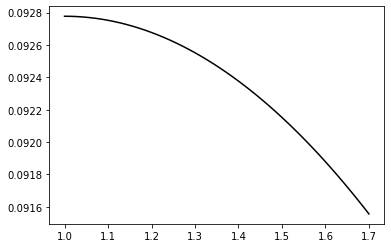

In [173]:
x = np.linspace(1.0, 1.7)

y = scipy.stats.norm.pdf(x,1.0,4.3)

plt.plot(x,y, color='black')